# Label to Distribution 

- label to gaussian pdf 

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.modules.loss import _WeightedLoss

In [13]:
st = torch.tensor( [0.1250, 0.5000, 0.1250, 0.1250, 0.1250])

In [14]:
x = torch.tensor([-1.7,-1,-0.5, 0, 0.5, 1, 1.7])

def pdf_fn(x):
  x_pdf = torch.exp( -(x)**2 /2  ) * 1/( torch.pi * torch.sqrt(torch.tensor(2)) )
  return x_pdf

x_pdf = torch.exp( -(x)**2 /2  ) * 1/( torch.pi * torch.sqrt(torch.tensor(2)) )
print(torch.sum(x_pdf))

tensor(1.0015)


In [15]:
label = torch.tensor([0,0,0, 0, 0, 1, 0])
len(label)

7

In [16]:
def label_to_dist(label):
  gap_ = 1
  target_label_index = torch.where(label==1)[0][0].numpy()
  label_dist = [i for i in np.arange(target_label_index,0,-gap_)] + [i for i in np.arange(0,len(label) - target_label_index,gap_ )]
  return label_dist

target_label_index = torch.where(label==1)[0][0].numpy()
[i for i in range(target_label_index,0,-1)] + [i for i in range(0,len(label) - target_label_index )]

[5, 4, 3, 2, 1, 0, 1]

In [17]:
y = label_to_dist(label)
print(y)
y = torch.tensor(y)
q = pdf_fn(y)
print(q)

[5, 4, 3, 2, 1, 0, 1]
tensor([8.3879e-07, 7.5506e-05, 2.5004e-03, 3.0461e-02, 1.3652e-01, 2.2508e-01,
        1.3652e-01])


<BarContainer object of 7 artists>

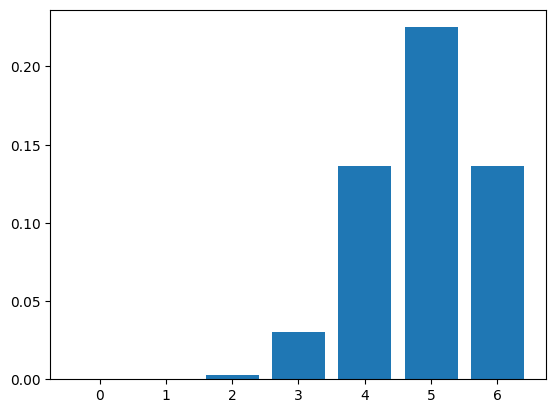

In [8]:
import matplotlib.pyplot as plt

plt.bar([0,1,2,3,4,5,6],q.numpy())

In [9]:
prediction = torch.tensor( [0.1,0.1,
                            0.1,0.1,
                            0.1,0.4,
                            0.1] )

tensor([1.5792e-06, 1.4215e-04, 4.7075e-03, 5.7349e-02, 2.5702e-01, 4.2376e-01,
        2.5702e-01])


<BarContainer object of 7 artists>

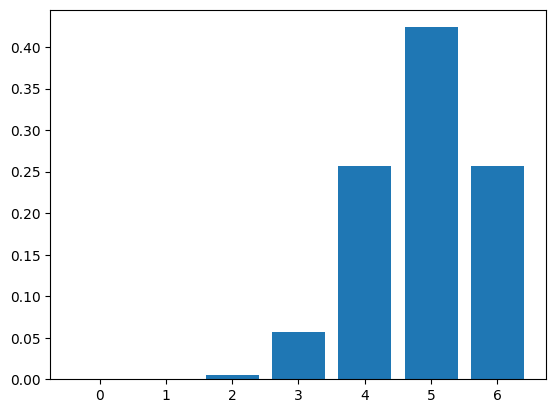

In [10]:
  # target 도 normalize 되어야 하나, => softmax 로 normalize 하면은 분포가 너무 고르게 된다.
# -->
target = q.clone()
target = target / sum(target)
#target = torch.tensor( [i/sum(target) for i in target] )
print(target)
plt.bar([0,1,2,3,4,5,6],target)

In [11]:
F.kl_div(prediction.log(), target, None, None, 'batchmean')

# 0.0046 <- prediction = ... 0.1, 0.4]
# -0.0129 <- prediction = ... 0.4, 0.1]

tensor(0.0661)

In [12]:
ce_target = torch.tensor([0,0,0,
                          0,0,1,
                          0],dtype=torch.float)
F.cross_entropy(prediction, ce_target)

tensor(1.6947)